In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
filepath = "../data/Final Categorization Data.csv"

df = pd.read_csv(filepath).sort_values(by=['SPD_DTOT'])

In [27]:
X1 = df[['Quarter', 'Origin Province', 'Destination Province', 'Main Reason']]
XD = df[['DURATION']]

Y1 = df['Total Bins (20)']
y_labels = Y1.unique()

In [41]:
from sklearn.datasets import load_iris
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
iris=load_iris()

X=iris.data
y=iris.target
X=(X-np.min(X))/(np.max(X)-np.min(X))

knn= KNeighborsClassifier(n_neighbors=3)

# https://isheunesu48.medium.com/cross-validation-using-k-fold-with-scikit-learn-cfc44bf1ce6
scores=[]
kFold=KFold(n_splits=10,random_state=42,shuffle=True)
for train_index,test_index in kFold.split(X):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

knn.fit(X_train,y_train)
scores.append(knn.score(X_test,y_test))
print(np.mean(scores))
cross_val_score(knn, X, y, cv=10)

Train Index:  [  0   1   2   3   4   5   6   7   8  10  11  13  14  15  16  17  20  21
  22  23  24  25  26  27  28  29  30  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  65  66  67  69  70  71  72  74  75  77  79  80  81  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 142 143 144 145 146 147 148 149]
Test Index:  [  9  12  18  19  31  36  64  68  73  76  78  82 110 118 141]
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  27  28  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  46  47  48  49  50  51  52  53  54  57  58  59
  60  61  62  63  64  65  66  67  68  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.93333333, 1.        , 1.        , 1.        ])

In [28]:
le = LabelEncoder()
le.fit(Y1)
Y2 = le.transform(Y1)

In [30]:
le.classes_

array(['$0-$20', '$110-$130', '$1225-$2024', '$130-$150', '$150-$185',
       '$185-$220', '$20-$35', '$2024-$79003', '$220-$265', '$265-$322',
       '$322-$400', '$35-$50', '$400-$500', '$50-$60', '$500-$650',
       '$60-$75', '$650-$862', '$75-$95', '$862-$1225', '$95-$110'],
      dtype=object)

In [31]:
quarter_list = ['1st Quarter', '2nd Quarter', '3rd Quarter', '4th Quarter']
province_list = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
               'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan','Alberta',
               'British Columbia', 'Yukon','Northwest Territories', 'Nunavut']
main_reason_list = ['Holiday/Leisure/Recreation', 'Friends/Relatives', 'Non-Business conference/convention/trade show',
                    'Shopping', 'School/Study', 'Medical', 'Religion', 'Other Personal',
                    'Business Meeting/Conference/Convention/Trade Show', 'Other Business']

categories = [quarter_list, province_list, province_list, main_reason_list]

enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(X1)
X2 = enc.transform(X1).toarray()

X3 = np.append(X2, XD.to_numpy(), axis = 1)

In [32]:


rfclss = RandomForestClassifier(max_depth=4, random_state=0)

In [33]:


kfold = KFold(n_splits=10,random_state=42,shuffle=True)

In [34]:

scores = []
y_true = []
y_pred = []


for train_index,test_index in kfold.split(X3):
    #print("Train Index: ", train_index)
    #print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X3[train_index], X3[test_index], Y2[train_index], Y2[test_index]
    rfclss.fit(X_train, y_train)
    y_pred_new = rfclss.predict(X_test)
    scores.append(rfclss.score(X_test, y_test))
    y_true = np.append(y_true, le.inverse_transform(y_test))
    y_pred = np.append(y_pred, le.inverse_transform(y_pred_new))

rfclss.fit(X_train, y_train)
y_pred_new = rfclss.predict(X_test)
scores.append(rfclss.score(X_test, y_test))
y_true = np.append(y_true, le.inverse_transform(y_test))
y_pred = np.append(y_pred, le.inverse_transform(y_pred_new))
print(np.mean(scores))
cm = confusion_matrix(y_true, y_pred)
#cross_val_score(rfclss, X3, Y2, cv=10)

0.13144342662719594


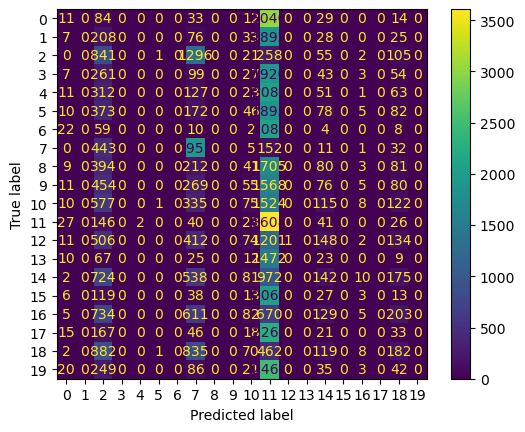

In [36]:


disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [50]:
cat_features = ['Quarter', 'Origin Province', 'Destination Province', 'Main Reason']
num_features = ['DURATION']
label = 'Total Bins (20)'
max_depth = 20
n_splits = 10

Categorical Features: ['Quarter', 'Origin Province', 'Destination Province', 'Main Reason']
Numeric Features: ['DURATION']
Label: Total Bins (20)
Max Depth: 20
k_fold: 10
Mean Score: 0.13074913695402474


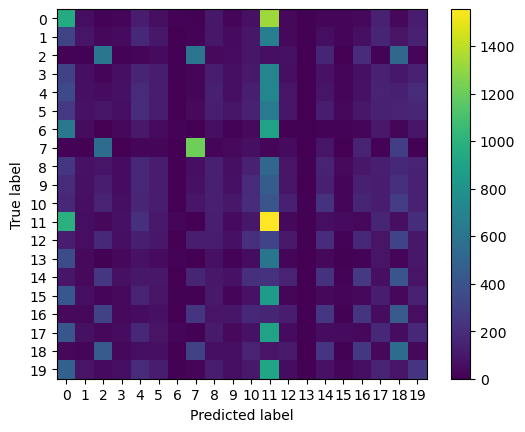

In [51]:
X1 = df[cat_features]
XD = df[num_features]

Y1 = df[label]
y_labels = Y1.unique()

le = LabelEncoder()
le.fit(Y1)
Y2 = le.transform(Y1)

enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(X1)
X2 = enc.transform(X1).toarray()

X3 = np.append(X2, XD.to_numpy(), axis = 1)

rfclss = RandomForestClassifier(max_depth=max_depth, random_state=0)

kfold = KFold(n_splits=n_splits,random_state=42,shuffle=True)

scores = []
y_true = []
y_pred = []


for train_index,test_index in kfold.split(X3):
    X_train, X_test, y_train, y_test = X3[train_index], X3[test_index], Y2[train_index], Y2[test_index]
    rfclss.fit(X_train, y_train)
    y_pred_new = rfclss.predict(X_test)
    scores.append(rfclss.score(X_test, y_test))
    y_true = np.append(y_true, le.inverse_transform(y_test))
    y_pred = np.append(y_pred, le.inverse_transform(y_pred_new))

rfclss.fit(X_train, y_train)
y_pred_new = rfclss.predict(X_test)
scores.append(rfclss.score(X_test, y_test))
y_true = np.append(y_true, le.inverse_transform(y_test))
y_pred = np.append(y_pred, le.inverse_transform(y_pred_new))
print("Categorical Features: " + str(cat_features))
print("Numeric Features: " + str(num_features))
print("Label: " + label)
print("Max Depth: " + str(max_depth))
print("k_fold: " + str(n_splits))
print("Mean Score: " + str(np.mean(scores)))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(include_values=False)
plt.show()